In [65]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import imutils
import glob
import random
import csv
from PIL import Image, ImageOps

In [66]:
def rotate(image, angle, center = None, scale = 1):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

In [67]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype = "float32")

    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect

def four_point_transform(image, pts):

    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    warped = cv2.resize(warped, (1000, 600))
    return tl, tr, br, bl, warped

In [68]:
def order_points2(pts):
    rect = np.zeros((4, 2), dtype = "float32")

    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect

def four_point_transform2(image, pts):

    rect = order_points2(pts)
    (tl, tr, br, bl) = rect
    return tl, tr, br, bl

def preprocess2(img):
    img = img.astype(np.uint8)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.dilate(gray,kernel,iterations = 1)
    gau = cv2.GaussianBlur(erosion, (5, 5), 0)
    edged = cv2.Canny(gau, 3, 200)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.05 * peri, True)
        # if our approximated contour has four points, then we
        # can assume that we have found our screen
        if len(approx) == 4:
            screenCnt = approx
#             print(type(screenCnt))
#             print(screenCnt)
            break
        else:
            screenCnt = np.array([[0,0], [0, 0], [0,0], [0, 0]])
            

    tl, tr, br, bl = four_point_transform2(img.copy(), screenCnt.reshape(4, 2))
    return tl, tr, br, bl, edged


In [69]:
# bg = cv2.imread(r"C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\bg\a (5).jpg")
# h, w, _ = bg.shape
# black_bg = np.zeros((h, w, 3))
# plt.subplot(1,2,1)
# plt.imshow(bg)

# plt.subplot(1,2,2)
# plt.imshow(black_bg)

In [70]:
# img = cv2.imread(r"C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\card\bank_card\0a7c9f51b5ed46b31ffc.jpg")
# h_, w_, _ = img.shape
# plt.imshow(img)

In [71]:
# #resize card
# abc = np.random.uniform(0.7, 0.85)
# w_new = int(w*abc)
# h_new = int(h_*(w_new/w_))

# out_auto = cv2.resize(img, (w_new, h_new) )
# h_, w_, _ = out_auto.shape

# plt.subplot(1,3,1)
# plt.imshow(bg)

# plt.subplot(1,3,2)
# plt.imshow(img)

# plt.subplot(1,3,3)
# plt.imshow(out_auto)

In [72]:
# x_min = int(w*0.1)
# y_min = int(h*0.1)
# x_max = int(w*0.15)
# y_max = int(h*0.15)

# # x1 = x_min
# # y1 = y_min
# x1 = np.random.randint(x_min, x_max)
# y1 = np.random.randint(y_min, y_max)

In [73]:
# bg[y1:y1+h_ , x1:x1+w_] = out_auto
# black_bg[y1:y1+h_ , x1:x1+w_] = out_auto

# plt.subplot(1,3,1)
# plt.imshow(bg)

# plt.subplot(1,3,2)
# plt.imshow(black_bg)

In [74]:
# angle = np.random.randint(-3,3)
# out_bg = rotate(bg, angle)
# h,w,_ = out_bg.shape
# out_bg_black = rotate(black_bg, angle)
# plt.subplot(1,3,1)
# plt.imshow(out_bg_black)

# plt.subplot(1,3,2)
# plt.imshow(black_bg)

In [75]:
# flexible = np.random.uniform(0.98,1.02)
# input_pts = np.float32([[0, 0],[w*flexible, 0],[w*flexible, h],[0, h*flexible]])
# output_pts = np.float32([[0, 0], [w, 0], [w, h], [0, h]])
# M = cv2.getPerspectiveTransform(input_pts,output_pts)
# out1 = cv2.warpPerspective(out_bg.copy(),M,(w, h),flags=cv2.INTER_LINEAR)
# out2 = cv2.warpPerspective(out_bg_black.copy(),M,(w, h),flags=cv2.INTER_LINEAR)

# plt.subplot(1,3,1)
# plt.imshow(out1)

# plt.subplot(1,3,2)
# plt.imshow(out2)

In [76]:
def add_white_border(image, border_size):

    # Calculate the new dimensions
    height, width, _ = image.shape
    new_width = width + (2 * border_size)
    new_height = height + (2 * border_size)

    # Create a new white background image
    bordered_image = cv2.copyMakeBorder(image, border_size, border_size, 
                                                border_size, border_size, 
                                                cv2.BORDER_CONSTANT, value=(255, 255, 255))

    return bordered_image

In [77]:
## Test border
# path = r"C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\card\all_card\card (3).jpeg"
# img = cv2.imread(path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(img.shape)
# border_size = 20

# img_new = add_white_border(img, border_size)
# print(img_new.shape)
# plt.subplot(1,2,1)
# plt.imshow(img)
# plt.subplot(1,2,2)
# plt.imshow(img_new)

In [1]:
path_bg = r"C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\bg\*"
path_img = r"C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\cp\*"
a = 0

#     print(h, w)\
for image in glob.glob(path_img):
    
    for file in glob.glob(path_bg):
        print(file)
        flipp = [-1, 0, 1]
        fl = random.choice(flipp)
        bg = cv2.imread(file)
        bg = cv2.flip(bg, fl)
        h, w, _ = bg.shape
        black_bg = np.zeros((h, w, 3))

        img = cv2.imread(image)
        h_, w_, _ = img.shape
#        add border
        border_size = 10
        img_border = add_white_border(img, border_size)

        #resize card
        abc = np.random.uniform(0.6, 0.75)
        w_new = int(w*abc)
        h_new = int(h_*(w_new/w_))

        out_auto = cv2.resize(img, (w_new, h_new) )
        out_auto2 = cv2.resize(img_border, (w_new, h_new) )
        h_, w_, _ = out_auto.shape


        x_min = int(w*0.1)
        y_min = int(h*0.1)
        x_max = int(w*0.15)
        y_max = int(h*0.15)

        x1 = np.random.randint(x_min, x_max)
        y1 = np.random.randint(y_min, y_max)


        #add card in bg
        if  (y1+h_) < h:
            bg[y1:y1+h_ , x1:x1+w_] = out_auto
            black_bg[y1:y1+h_ , x1:x1+w_] = out_auto2
        
        else:
            continue

        # rotate img
        angle = np.random.randint(-3,3)
        out_bg = rotate(bg, angle)
        h,w,_ = out_bg.shape
        out_bg_black = rotate(black_bg, angle)

        # Tranform img (làm méo hình)
        flexible = np.random.uniform(0.98,1.02)
        input_pts = np.float32([[0, 0],[w*flexible, 0],[w*flexible, h],[0, h*flexible]])
        output_pts = np.float32([[0, 0], [w, 0], [w, h], [0, h]])
        M = cv2.getPerspectiveTransform(input_pts,output_pts)
        out1 = cv2.warpPerspective(out_bg.copy(),M,(w, h),flags=cv2.INTER_LINEAR)
        out2 = cv2.warpPerspective(out_bg_black.copy(),M,(w, h),flags=cv2.INTER_LINEAR)

        fi = str(a)
        path_save1 = "C:/Users/ADMIN/Desktop/Thay_Lam/CCCD/imgs/output3/" + fi + ".jpg"
        cv2.imwrite(path_save1, out1)
    #     path_save2 = "C:/Users/ADMIN/Desktop/Thay_Lam/CCCD/imgs/output2/" + fi + ".jpg"
#         cv2.imwrite(path_save2, out2)

        tl, tr, br, bl, canny = preprocess2(out2)
#         path_save2 = "C:/Users/ADMIN/Desktop/Thay_Lam/CCCD/imgs/output2/" + fi + "_canny.jpg"
#         cv2.imwrite(path_save2, canny)
        tl = tl / np.array([w, h])
        tr = tr / np.array([w, h])
        bl = bl / np.array([w, h])
        br = br / np.array([w, h])

        tl = [round(num, 3) for num in tl]
        tr = [round(num, 3) for num in tr]
        bl = [round(num, 3) for num in bl]
        br = [round(num, 3) for num in br]
        abc = []
        abc.append(tl)
        abc.append(tr)
        abc.append(br)
        abc.append(bl)



        csv_filename = 'points3.csv'

        # Open the CSV file in write mode
        with open(csv_filename, 'a+', newline='') as csvfile:
            writer = csv.writer(csvfile)

            # Write the flattened list of coordinates as a single row
            writer.writerow([path_save1] + [coord for point in abc for coord in point]+ [1])

        a+=1
#         if a >= 2:
#             break

NameError: name 'glob' is not defined

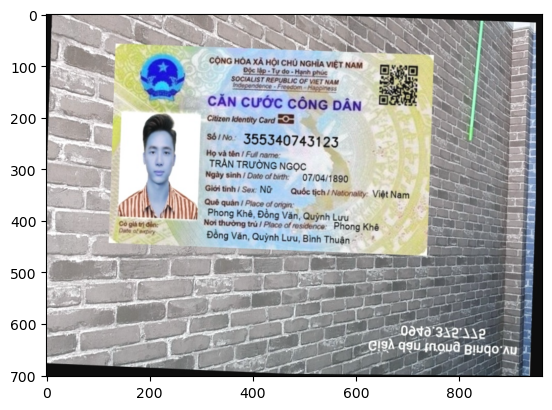

In [82]:
import cv2
points = [0.138,0.078,0.783,0.11,0.769,0.67,0.125,0.634
]

path = "C:/Users/ADMIN/Desktop/Thay_Lam/CCCD/imgs/output3/9.jpg"
img = cv2.imread(path)
h, w, _ = img.shape
plt.imshow(img)

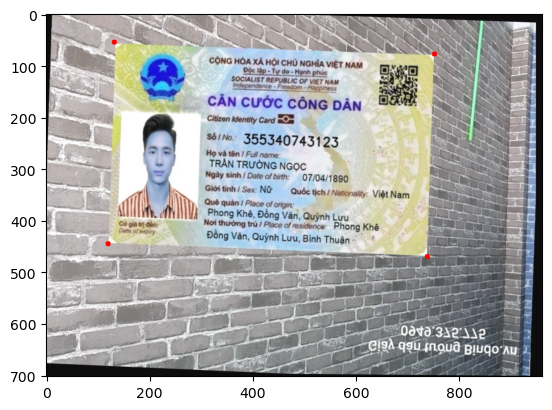

In [83]:
b = cv2.circle(img.copy(), (int(points[0]*w),int(points[1]*h)) , 5, (255,0,0), -1)
b = cv2.circle(b.copy(), (int(points[2]*w),int(points[3]*h)) , 5, (255,0,0), -1)
b = cv2.circle(b.copy(), (int(points[4]*w),int(points[5]*h)) , 5, (255,0,0), -1)
b = cv2.circle(b.copy(), (int(points[6]*w),int(points[7]*h)) , 5, (255,0,0), -1)
plt.imshow(b)

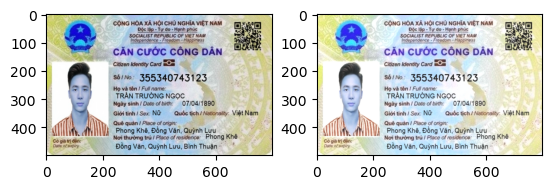

In [62]:
import cv2
import random
import numpy as np
# read the input image
img = cv2.imread(r"C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\cp\0.jpg")

# define the contrast and brightness value
contrast = 1 # Contrast control ( 0 to 127)
brightness = np.random.randint(-20,20) # Brightness control (0-100)

# call addWeighted function. use beta = 0 to effectively only
# operate on one image
out = cv2.addWeighted( img, contrast, img, 0, 30)

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(out)

In [79]:
import glob

for i in glob.glob(r"C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\*"):
    print(i)
    img = cv2.imread(i)
    contrast = 1 # Contrast control ( 0 to 127)
    brightness = np.random.randint(-30,30)
    out = cv2.addWeighted( img, contrast, img, 0, brightness)
    cv2.imwrite(i, out)
    

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\0.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\10.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\100.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1000.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1001.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1002.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1003.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1004.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1005.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1006.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1007.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1008.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1009.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\101.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1010.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1011.jpg
C:\User

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1128.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1129.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\113.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1130.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1131.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1132.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1133.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1134.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1135.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1136.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1137.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1138.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1139.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\114.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1140.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1141.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1142.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1257.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1258.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1259.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\126.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1260.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1261.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1262.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1263.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1264.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1265.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1266.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1267.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1268.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1269.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\127.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1270.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1271.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1385.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1386.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1387.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1388.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1389.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\139.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1390.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1391.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1392.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1393.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1394.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1395.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1396.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1397.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1398.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1399.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\14.jpg


C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1516.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1517.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1518.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1519.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\152.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1520.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1521.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1522.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1523.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1524.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1525.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1526.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1527.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1528.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1529.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\153.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1530.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1664.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1665.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1666.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1667.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1668.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1669.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\167.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1670.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1671.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1672.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1673.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1674.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1675.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1676.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1677.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1678.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1679.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1796.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1797.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1798.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1799.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\18.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\180.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1800.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1801.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1802.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1803.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1804.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1805.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1806.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1807.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1808.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1809.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\181.jpg
C

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1926.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1927.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1928.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1929.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\193.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1930.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1931.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1932.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1933.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1934.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1935.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1936.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1937.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1938.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1939.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\194.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\1940.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2055.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2056.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2057.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2058.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2059.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\206.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2060.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2061.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2062.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2063.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2064.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2065.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2066.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2067.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2068.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2069.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\207.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2181.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2182.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2183.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2184.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2185.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2186.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2187.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2188.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2189.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\219.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2190.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2191.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2192.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2193.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2194.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2195.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2196.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2318.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2319.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\232.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2320.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2321.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2322.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2323.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2324.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2325.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2326.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2327.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2328.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2329.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\233.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2330.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2331.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2332.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2448.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2449.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\245.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2450.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2451.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2452.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2453.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2454.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2455.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2456.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2457.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2458.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2459.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\246.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2460.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2461.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2462.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2578.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2579.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\258.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2580.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2581.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2582.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2583.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2584.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2585.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2586.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2587.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2588.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2589.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\259.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2590.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2591.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2592.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2706.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2707.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2708.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2709.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\271.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2710.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2711.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2712.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2713.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2714.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2715.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2716.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2717.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2718.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2719.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\272.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2720.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2833.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2834.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2835.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2836.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2837.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2838.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2839.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\284.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2840.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2841.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2842.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2843.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2844.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2845.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2846.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2847.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2848.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2970.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2971.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2972.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2973.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2974.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2975.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2976.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2977.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2978.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2979.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\298.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2980.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2981.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2982.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2983.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2984.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\2985.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3122.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3123.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3124.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3125.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3126.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3127.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3128.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3129.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\313.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3130.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3131.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3132.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3133.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3134.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3135.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3136.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3137.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3250.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3251.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3252.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3253.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3254.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3255.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3256.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3257.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3258.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3259.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\326.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3260.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3261.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3262.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3263.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3264.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3265.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3384.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3385.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3386.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3387.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3388.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3389.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\339.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3390.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3391.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3392.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3393.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3394.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3395.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3396.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3397.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3398.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3399.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3511.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3512.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3513.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3514.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3515.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3516.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3517.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3518.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3519.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\352.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3520.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3521.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3522.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3523.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3524.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3525.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3526.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3646.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3647.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3648.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3649.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\365.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3650.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3651.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3652.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3653.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3654.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3655.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3656.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3657.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3658.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3659.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\366.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3660.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3778.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3779.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\378.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3780.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3781.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3782.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3783.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3784.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3785.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3786.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3787.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3788.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3789.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\379.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3790.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3791.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3792.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3914.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3915.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3916.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3917.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3918.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3919.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\392.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3920.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3921.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3922.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3923.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3924.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3925.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3926.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3927.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3928.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\3929.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4045.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4046.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4047.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4048.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4049.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\405.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4050.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4051.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4052.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4053.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4054.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4055.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4056.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4057.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4058.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4059.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\406.jpg

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4172.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4173.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4174.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4175.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4176.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4177.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4178.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4179.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\418.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4180.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4181.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4182.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4183.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4184.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4185.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4186.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4187.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4303.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4304.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4305.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4306.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4307.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4308.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4309.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\431.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4310.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4311.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4312.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4313.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4314.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4315.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4316.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4317.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4318.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4441.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4442.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4443.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4444.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4445.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4446.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4447.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4448.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4449.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\445.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4450.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4451.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4452.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4453.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4454.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4455.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4456.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4570.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4571.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4572.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4573.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4574.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4575.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4576.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4577.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4578.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4579.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\458.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4580.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4581.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4582.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4583.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4584.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4585.jp

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4699.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\47.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\470.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4700.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4701.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4702.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4703.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4704.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4705.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4706.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4707.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4708.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4709.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\471.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4710.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4711.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4712.jpg
C

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\483.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4830.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4831.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4832.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4833.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4834.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4835.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4836.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4837.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4838.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4839.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\484.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4840.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4841.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4842.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\4843.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\485.jpg


C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\600.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\601.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\602.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\603.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\604.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\605.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\606.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\607.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\608.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\609.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\61.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\610.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\611.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\612.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\613.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\614.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\615.jpg
C:\Users\ADMIN\

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\729.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\73.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\730.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\731.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\732.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\733.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\734.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\735.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\736.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\737.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\738.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\739.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\74.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\740.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\741.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\742.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\743.jpg
C:\Users\ADMIN\D

C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\865.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\866.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\867.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\868.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\869.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\87.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\870.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\871.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\872.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\873.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\874.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\875.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\876.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\877.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\878.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\879.jpg
C:\Users\ADMIN\Desktop\Thay_Lam\CCCD\imgs\output3\88.jpg
C:\Users\ADMIN\D